<a href="https://colab.research.google.com/github/JasmineHuang25/Blog4_bankruptcy_prediction/blob/main/bankruptcy_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Installation and import

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!apt install chromium-chromedriver
!pip install dataframe_image

In [109]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer,  make_column_selector as selector
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import plot_confusion_matrix, recall_score,\
    accuracy_score, precision_score, f1_score

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImPipeline

from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

import dataframe_image as dfi

### Inspect DataFrame

In [3]:
df = pd.read_csv('/content/gdrive/MyDrive/4blog/data.csv')

In [4]:
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [6]:
df['Bankrupt?'].value_counts(normalize=True)

0    0.967737
1    0.032263
Name: Bankrupt?, dtype: float64

In [7]:
df.isna().sum()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

In [8]:
df.columns = df.columns.str.replace(' ', '')

In [9]:
df.columns

Index(['Bankrupt?', 'ROA(C)beforeinterestanddepreciationbeforeinterest',
       'ROA(A)beforeinterestand%aftertax',
       'ROA(B)beforeinterestanddepreciationaftertax', 'OperatingGrossMargin',
       'RealizedSalesGrossMargin', 'OperatingProfitRate',
       'Pre-taxnetInterestRate', 'After-taxnetInterestRate',
       'Non-industryincomeandexpenditure/revenue',
       'Continuousinterestrate(aftertax)', 'OperatingExpenseRate',
       'Researchanddevelopmentexpenserate', 'Cashflowrate',
       'Interest-bearingdebtinterestrate', 'Taxrate(A)', 'NetValuePerShare(B)',
       'NetValuePerShare(A)', 'NetValuePerShare(C)',
       'PersistentEPSintheLastFourSeasons', 'CashFlowPerShare',
       'RevenuePerShare(Yuan¥)', 'OperatingProfitPerShare(Yuan¥)',
       'PerShareNetprofitbeforetax(Yuan¥)',
       'RealizedSalesGrossProfitGrowthRate', 'OperatingProfitGrowthRate',
       'After-taxNetProfitGrowthRate', 'RegularNetProfitGrowthRate',
       'ContinuousNetProfitGrowthRate', 'TotalAssetGrowthR

### Checking correlation

In [10]:
df.corr()['Bankrupt?']

Bankrupt?                                            1.000000
ROA(C)beforeinterestanddepreciationbeforeinterest   -0.260807
ROA(A)beforeinterestand%aftertax                    -0.282941
ROA(B)beforeinterestanddepreciationaftertax         -0.273051
OperatingGrossMargin                                -0.100043
                                                       ...   
LiabilitytoEquity                                    0.166812
DegreeofFinancialLeverage(DFL)                       0.010508
InterestCoverageRatio(InterestexpensetoEBIT)        -0.005509
NetIncomeFlag                                             NaN
EquitytoLiability                                   -0.083048
Name: Bankrupt?, Length: 96, dtype: float64

In [11]:
corr = abs(df.corr()['Bankrupt?']).sort_values(ascending=False)
corr

Bankrupt?                                            1.000000
NetIncometoTotalAssets                               0.315457
ROA(A)beforeinterestand%aftertax                     0.282941
ROA(B)beforeinterestanddepreciationaftertax          0.273051
ROA(C)beforeinterestanddepreciationbeforeinterest    0.260807
                                                       ...   
Long-termLiabilitytoCurrentAssets                    0.000778
CashFlowtoSales                                      0.000479
RealizedSalesGrossProfitGrowthRate                   0.000458
OperatingProfitRate                                  0.000230
NetIncomeFlag                                             NaN
Name: Bankrupt?, Length: 96, dtype: float64

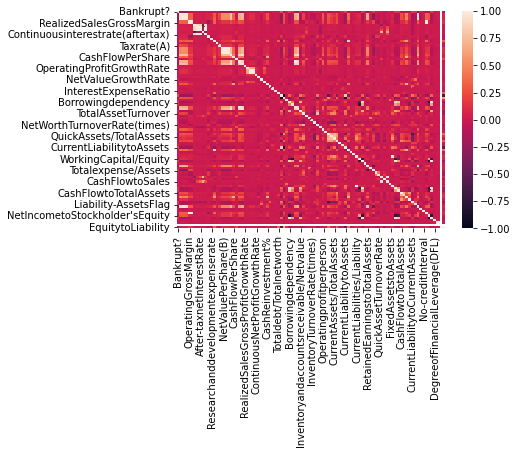

In [12]:
sns.heatmap(data = df.corr())
plt.show();

In [13]:
# type(corr)

In [14]:
# corr_high = corr.loc[lambda x : x >= 0.1]

In [15]:
# corr_high

In [16]:
# len(corr_high)

In [17]:
# new_df = df[[col for col in df.columns if col in corr_high.index]]

In [18]:
# new_df.head(10)

In [19]:
# new_df.describe()

## Prepare for modeling

### Set target and perform train_test_split

In [20]:
X = df.drop('Bankrupt?', axis=1)
y = df['Bankrupt?']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.33)

### Bringing in Our Modeling Class from before

In [21]:
class ModelWithCV():
    '''Structure to save the model and more easily see its crossvalidation'''
    
    def __init__(self, model, model_name, X, y, cv_now=True):
        self.model = model
        self.name = model_name
        self.X = X
        self.y = y
        
        # For CV results
        self.cv_results = None
        self.cv_mean = None
        self.cv_median = None
        self.cv_std = None
        #
        if cv_now:
            self.cross_validate()
        
    def cross_validate(self, X=None, y=None, kfolds=10):
        '''
        Perform cross-validation and return results.
        
        Args: 
          X:
            Optional; Training data to perform CV on. Otherwise use X from object
          y:
            Optional; Training data to perform CV on. Otherwise use y from object
          kfolds:
            Optional; Number of folds for CV (default is 10)  
        '''
        
        cv_X = X if X else self.X
        cv_y = y if y else self.y

        self.cv_results = cross_val_score(self.model, cv_X, cv_y, cv=kfolds)
        self.cv_mean = np.mean(self.cv_results)
        self.cv_median = np.median(self.cv_results)
        self.cv_std = np.std(self.cv_results)
        
        # Validate score on test data
        self.cv_results_test = cross_val_score(self.model, X_test, y_test, cv=kfolds)
        self.cv_test_mean = np.mean(self.cv_results_test)
        
    def print_cv_summary(self):
        cv_summary = self.cv_mean
        return cv_summary
        
#         cv_summary = (
#         f'''CV Results for `{self.name}` model:
#             {self.cv_mean:.5f} ± {self.cv_std:.5f} accuracy
#         ''')
#         print(cv_summary)


    def print_cv_test_summary(self):
        cv_test_summary = self.cv_test_mean
        return cv_test_summary


    def plot_cv(self, ax):
        '''
        Plot the cross-validation values using the array of results and given 
        Axis for plotting.
        '''
        ax.set_title(f'CV Results for `{self.name}` Model')
        
        # Thinner violinplot with higher bw
        sns.violinplot(y=self.cv_results, ax=ax, bw=.4)
        sns.swarmplot(
                y=self.cv_results,
                color='orange',
                size=10,
                alpha= 0.8,
                ax=ax
        )

        return ax

### Create functions to catch scores and confusion matrix

In [112]:
cf_matrix_train_list = []
cf_matrix_test_list = []

accuracy_train_dict = {}
recall_train_dict = {}
precision_train_dict = {}
f1_train_dict = {}

accuracy_test_dict = {}
recall_test_dict = {}
precision_test_dict = {}
f1_test_dict = {}

miss_rate_list = []

In [23]:
def add_4scores_train(model_name):
    accuracy_train_dict[model_name] = accuracy_score(y_train, y_hat_train)
    recall_train_dict[model_name] = recall_score(y_train, y_hat_train)
    precision_train_dict[model_name] = precision_score(y_train, y_hat_train)
    f1_train_dict[model_name] = f1_score(y_train, y_hat_train)

def add_4scores_test(model_name):
    accuracy_test_dict[model_name] = accuracy_score(y_test, y_hat_test)
    recall_test_dict[model_name] = recall_score(y_test, y_hat_test)
    precision_test_dict[model_name] = precision_score(y_test, y_hat_test)
    f1_test_dict[model_name] = f1_score(y_test, y_hat_test)

In [24]:
def print_4scores_train(model_name):
    return print(f"""
The model's accuracy on the train set is {round(accuracy_train_dict[model_name], 4)} \n
The model's recall on the train set is {round(recall_train_dict[model_name], 4)} \n
The model's precision on the train set is {round(precision_train_dict[model_name], 4)} \n
The model's f1-score on the train is {round(f1_train_dict[model_name], 4)}
""")

def print_4scores_test(model_name):
    return print(f"""
The model's accuracy on the test set is {round(accuracy_test_dict[model_name], 4)} \n
The model's recall on the test set is {round(recall_test_dict[model_name], 4)} \n
The model's precision on the test set is {round(precision_test_dict[model_name], 4)} \n
The model's f1-score on the test is {round(f1_test_dict[model_name], 4)}
""")

In [110]:
def get_miss_rate(model_name):
  y_hat=model_name.predict(X_test)
  TN, FP, FN, TP = confusion_matrix(y_test, y_hat).ravel()
  miss_rate = FN/(FN+TP)
  return miss_rate

## Model 1 - Dummy Classifier Model 

In [25]:
dummy_model = DummyClassifier()

In [26]:
dummy_model_cv =  ModelWithCV(dummy_model, model_name='dummy', X=X_train, y=y_train)

In [27]:
dummy_model_cv.print_cv_summary()

0.9695712887250949

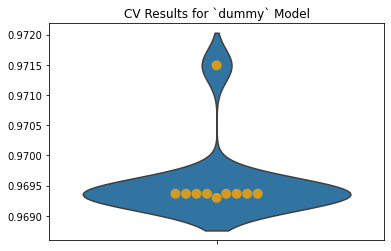

In [28]:
fig,ax = plt.subplots()

dummy_model_cv.plot_cv(ax=ax)

In [29]:
# Score on training data:

dummy_score_train = dummy_model_cv.print_cv_summary()
dummy_score_train

0.9695712887250949

In [30]:
# Validate with testing data:

dummy_score_test = dummy_model_cv.print_cv_test_summary()
dummy_score_test

0.9640176991150442

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, 


The model's accuracy on the train set is 0.9696 

The model's recall on the train set is 0.0 

The model's precision on the train set is 0.0 

The model's f1-score on the train is 0.0


The model's accuracy on the test set is 0.964 

The model's recall on the test set is 0.0 

The model's precision on the test set is 0.0 

The model's f1-score on the test is 0.0



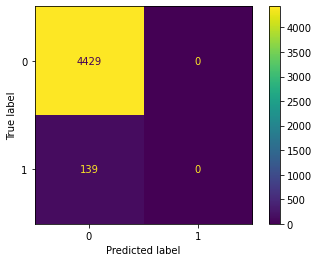

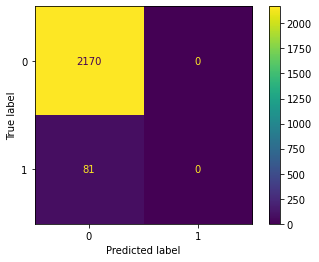

In [113]:
# Fit the model:
dummy_model.fit(X_train, y_train)

# Plot confusion_matrix on training data:
matrix_train_model1 = plot_confusion_matrix(dummy_model, X_train, y_train);
cf_matrix_train_list.append(matrix_train_model1)

# Plot confusion_matrix on testing data:
matrix_test_model1 = plot_confusion_matrix(dummy_model, X_test, y_test);
cf_matrix_test_list.append(matrix_test_model1)

# Print 4 scores on training data:
y_hat_train = dummy_model.predict(X_train)
add_4scores_train('model1')
print_4scores_train('model1')

# Print 4 scores on testing data:
y_hat_test = dummy_model.predict(X_test)
add_4scores_test('model1')
print_4scores_test('model1')

# calculate miss_rate:
modle1_miss_rate = get_miss_rate(dummy_model)
miss_rate_list.append(modle1_miss_rate)

## Model 2 - Logistic Regression Model

In [32]:
logreg_model = LogisticRegression(random_state=42, solver='saga', max_iter=300)

In [33]:
# Use the class with out logreg pipe

logreg_model_cv =  ModelWithCV(logreg_model, model_name='logreg',X=X_train, y=y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means 

In [34]:
# Score on training data:

logreg_score_train = logreg_model_cv.print_cv_summary()
logreg_score_train

0.9649746631348612

In [35]:
# Validate with testing data:

logreg_score_test = logreg_model_cv.print_cv_test_summary()
logreg_score_test

0.9569085545722714

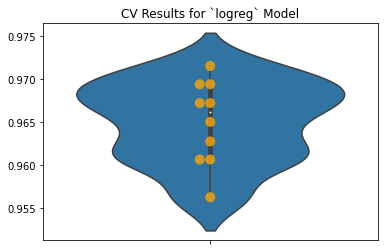

In [36]:
fig,ax = plt.subplots()
logreg_model_cv.plot_cv(ax=ax)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)



The model's accuracy on the train set is 0.9667 

The model's recall on the train set is 0.0216 

The model's precision on the train set is 0.1579 

The model's f1-score on the train is 0.038


The model's accuracy on the test set is 0.9578 

The model's recall on the test set is 0.0123 

The model's precision on the test set is 0.0625 

The model's f1-score on the test is 0.0206



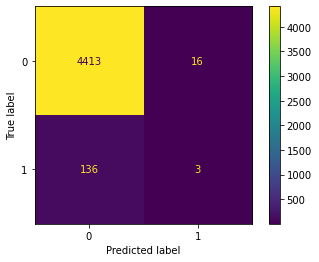

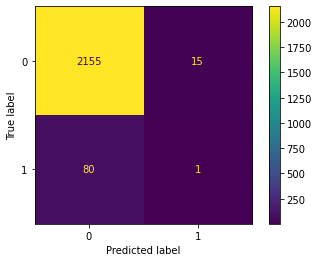

In [115]:
# Fit the model:
logreg_model.fit(X_train, y_train)

# Plot confusion_matrix on training data:
matrix_train_model2 = plot_confusion_matrix(logreg_model, X_train, y_train);
cf_matrix_train_list.append(matrix_train_model2)

# Plot confusion_matrix on testing data:
matrix_test_model2 = plot_confusion_matrix(logreg_model, X_test, y_test);
cf_matrix_test_list.append(matrix_test_model2)

# Print 4 scores on training data:
y_hat_train = logreg_model.predict(X_train)
add_4scores_train('model2')
print_4scores_train('model2')

# Print 4 scores on testing data:
y_hat_test = logreg_model.predict(X_test)
add_4scores_test('model2')
print_4scores_test('model2')

# calculate miss_rate:
modle2_miss_rate = get_miss_rate(logreg_model)
miss_rate_list.append(modle2_miss_rate)

## Model 3 - Random Forest Model

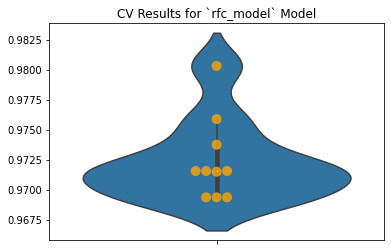

In [38]:
rfc_model = RandomForestClassifier(random_state=42)

rfc_model_cv = ModelWithCV(model=rfc_model,
                          model_name='rfc_model',
                          X=X_train,
                          y=y_train)

fig, ax = plt.subplots()

rfc_model_cv.plot_cv(ax=ax);

In [39]:
# Score on training data:

rfc_score_train = rfc_model_cv.print_cv_summary()
rfc_score_train

0.9724173672693768

In [40]:
# Validate with testing data:

rfc_score_test = rfc_model_cv.print_cv_test_summary()
rfc_score_test

0.962684365781711

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)



The model's accuracy on the train set is 0.9998 

The model's recall on the train set is 0.9928 

The model's precision on the train set is 1.0 

The model's f1-score on the train is 0.9964


The model's accuracy on the test set is 0.9662 

The model's recall on the test set is 0.1358 

The model's precision on the test set is 0.6471 

The model's f1-score on the test is 0.2245



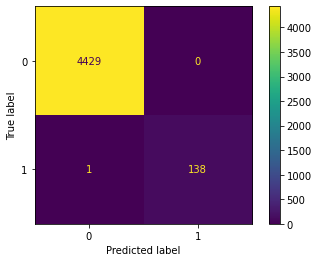

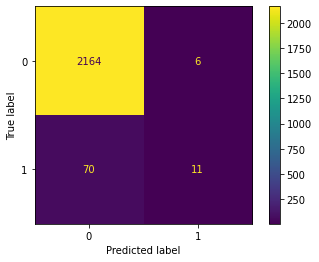

In [118]:
# Fit the model:
rfc_model.fit(X_train, y_train)

# Plot confusion_matrix on training data:
matrix_train_model3 = plot_confusion_matrix(rfc_model, X_train, y_train);
cf_matrix_train_list.append(matrix_train_model3)

# Plot confusion_matrix on testing data:
matrix_test_model3 = plot_confusion_matrix(rfc_model, X_test, y_test);
cf_matrix_test_list.append(matrix_test_model3)


# Print 4 scores on training data:
y_hat_train = rfc_model.predict(X_train)
add_4scores_train('model3')
print_4scores_train('model3')

# Print 4 scores on testing data:
y_hat_test = rfc_model.predict(X_test)
add_4scores_test('model3')
print_4scores_test('model3')

# calculate miss_rate:
modle3_miss_rate = get_miss_rate(rfc_model)
miss_rate_list.append(modle3_miss_rate)

### Finding
Random Forest Model is the best model so far with the highest F1 score.

## Model 4 - Gradient Booster Model

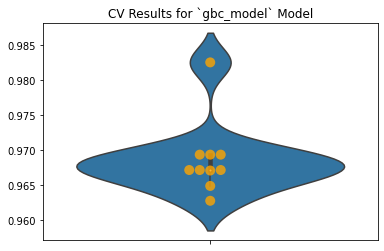

In [42]:
# gbc!
gbc_model = GradientBoostingClassifier(random_state=42)

gbc_model_cv = ModelWithCV(model=gbc_model,
                          model_name='gbc_model',
                          X=X_train,
                          y=y_train)

fig, ax = plt.subplots()

gbc_model_cv.plot_cv(ax=ax);

In [43]:
# Score on training data:

gbc_score_train = gbc_model_cv.print_cv_summary()
gbc_score_train

0.9686940957426391

In [44]:
# Validate with testing data:

gbc_score_test = gbc_model_cv.print_cv_test_summary()
gbc_score_test

0.9609065880039331

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)



The model's accuracy on the train set is 0.9958 

The model's recall on the train set is 0.8633 

The model's precision on the train set is 1.0 

The model's f1-score on the train is 0.9266


The model's accuracy on the test set is 0.9622 

The model's recall on the test set is 0.2593 

The model's precision on the test set is 0.4565 

The model's f1-score on the test is 0.3307



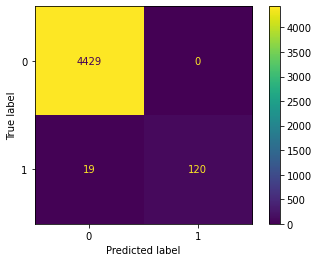

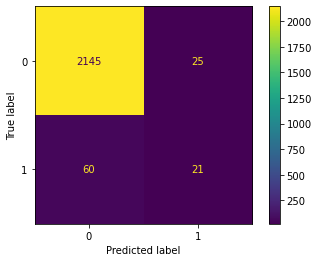

In [120]:
# Fit the model:
gbc_model.fit(X_train, y_train)

# Plot confusion_matrix on training data:
matrix_train_model4 = plot_confusion_matrix(gbc_model, X_train, y_train);
cf_matrix_train_list.append(matrix_train_model4)

# Plot confusion_matrix on testing data:
matrix_test_model4 = plot_confusion_matrix(gbc_model, X_test, y_test);
cf_matrix_test_list.append(matrix_test_model4)

# Print 4 scores on training data:
y_hat_train = gbc_model.predict(X_train)
add_4scores_train('model4')
print_4scores_train('model4')

# Print 4 scores on testing data:
y_hat_test = gbc_model.predict(X_test)
add_4scores_test('model4')
print_4scores_test('model4')

# calculate miss_rate:
modle4_miss_rate = get_miss_rate(gbc_model)
miss_rate_list.append(modle4_miss_rate)

### Finding
Gradient Booster Model is better than Randon Forest Model because of the higher F1 score.

## Model 5 - Decision Tree Model

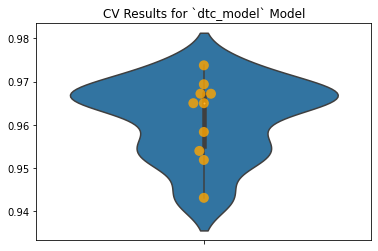

In [46]:
dtc_model = DecisionTreeClassifier(random_state=42)

dtc_model_cv = ModelWithCV(model=dtc_model,
                          model_name='dtc_model',
                          X=X_train,
                          y=y_train)

fig, ax = plt.subplots()

dtc_model_cv.plot_cv(ax=ax);

In [47]:
# Score on training data:

dtc_score_train = dtc_model_cv.print_cv_summary()
dtc_score_train

0.961468770394257

In [48]:
# Validate with testing data:

dtc_score_test = dtc_model_cv.print_cv_test_summary()
dtc_score_test

0.9449105211406097

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)



The model's accuracy on the train set is 1.0 

The model's recall on the train set is 1.0 

The model's precision on the train set is 1.0 

The model's f1-score on the train is 1.0


The model's accuracy on the test set is 0.952 

The model's recall on the test set is 0.3704 

The model's precision on the test set is 0.3448 

The model's f1-score on the test is 0.3571



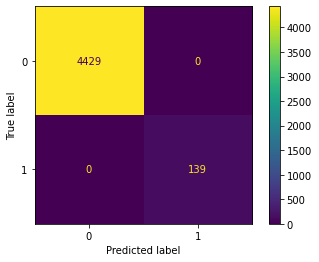

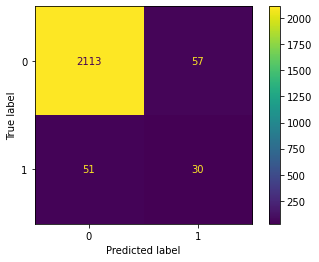

In [123]:
# Fit the model:
dtc_model.fit(X_train, y_train)

# Plot confusion_matrix on training data:
matrix_train_model5 = plot_confusion_matrix(dtc_model, X_train, y_train);
cf_matrix_train_list.append(matrix_train_model5)

# Plot confusion_matrix on testing data:
matrix_test_model5 = plot_confusion_matrix(dtc_model, X_test, y_test);
cf_matrix_test_list.append(matrix_test_model5)

# Print 4 scores on training data:
y_hat_train = dtc_model.predict(X_train)
add_4scores_train('model5')
print_4scores_train('model5')

# Print 4 scores on testing data:
y_hat_test = dtc_model.predict(X_test)
add_4scores_test('model5')
print_4scores_test('model5')

# calculate miss_rate:
modle5_miss_rate = get_miss_rate(dtc_model)
miss_rate_list.append(modle5_miss_rate)

### Finding
Decision Tree Model and Gradient Booster Model are the best 2 modles so far.  Will try to tune those models.

In [125]:
miss_rate_list.pop(3)

0.7407407407407407

## Model 6 - Tuning and Cross-validating: Gradient Booster Model

In [50]:
# Set up pipeline:
gbc_pipe = Pipeline([('gbc', GradientBoostingClassifier(random_state=42))])
gbc_pipe

Pipeline(steps=[('gbc', GradientBoostingClassifier(random_state=42))])

In [51]:
# Set up parameters:
params = {
        'gbc__loss':['log_loss', 'deviance', 'exponential'],
        'gbc__criterion':['friedman_mse', 'squared_error'],
        'gbc__max_depth':[1, 3, 5]
}

# Set up GridSearchCV and fit training data:
gs_gbc = GridSearchCV(estimator=gbc_pipe, param_grid=params, cv=10, verbose=2)

gs_gbc.fit(X_train, y_train)

Fitting 10 folds for each of 18 candidates, totalling 180 fits
[CV] END gbc__criterion=friedman_mse, gbc__loss=log_loss, gbc__max_depth=1; total time=   0.0s
[CV] END gbc__criterion=friedman_mse, gbc__loss=log_loss, gbc__max_depth=1; total time=   0.0s
[CV] END gbc__criterion=friedman_mse, gbc__loss=log_loss, gbc__max_depth=1; total time=   0.0s
[CV] END gbc__criterion=friedman_mse, gbc__loss=log_loss, gbc__max_depth=1; total time=   0.0s
[CV] END gbc__criterion=friedman_mse, gbc__loss=log_loss, gbc__max_depth=1; total time=   0.0s
[CV] END gbc__criterion=friedman_mse, gbc__loss=log_loss, gbc__max_depth=1; total time=   0.0s
[CV] END gbc__criterion=friedman_mse, gbc__loss=log_loss, gbc__max_depth=1; total time=   0.0s
[CV] END gbc__criterion=friedman_mse, gbc__loss=log_loss, gbc__max_depth=1; total time=   0.0s
[CV] END gbc__criterion=friedman_mse, gbc__loss=log_loss, gbc__max_depth=1; total time=   0.0s
[CV] END gbc__criterion=friedman_mse, gbc__loss=log_loss, gbc__max_depth=1; total 

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_gb.py", line 525, in fit
    self._check_params()
  File "/usr/local/lib/python3.8/dist-packages/sklearn/

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('gbc',
                                        GradientBoostingClassifier(random_state=42))]),
             param_grid={'gbc__criterion': ['friedman_mse', 'squared_error'],
                         'gbc__loss': ['log_loss', 'deviance', 'exponential'],
                         'gbc__max_depth': [1, 3, 5]},
             verbose=2)

In [52]:
gs_gbc.best_params_

{'gbc__criterion': 'friedman_mse',
 'gbc__loss': 'exponential',
 'gbc__max_depth': 1}

In [53]:
gs_gbc_score_train = gs_gbc.best_score_
gs_gbc_score_train

0.971323275365657

In [54]:
# Validate with testing data:
gs_gbc_score_test = gs_gbc.best_estimator_.score(X_test, y_test)
gs_gbc_score_test

0.9649044868947134

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)



The model's accuracy on the train set is 0.9726 

The model's recall on the train set is 0.1655 

The model's precision on the train set is 0.7188 

The model's f1-score on the train is 0.269


The model's accuracy on the test set is 0.9649 

The model's recall on the test set is 0.0988 

The model's precision on the test set is 0.5714 

The model's f1-score on the test is 0.1684



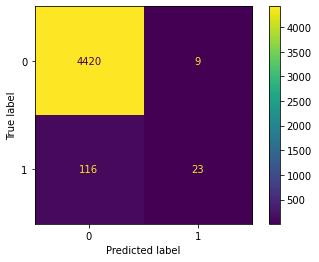

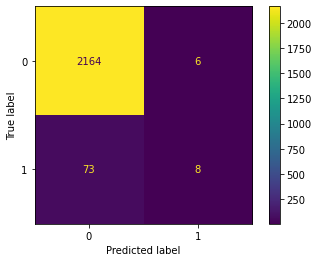

In [127]:
# Plot confusion_matrix on training data:
matrix_train_model6 = plot_confusion_matrix(gs_gbc, X_train, y_train);
cf_matrix_train_list.append(matrix_train_model6)

# Plot confusion_matrix on testing data:
matrix_test_model6 = plot_confusion_matrix(gs_gbc, X_test, y_test);
cf_matrix_test_list.append(matrix_test_model6)

# Print 4 scores on training data:
y_hat_train = gs_gbc.predict(X_train)
add_4scores_train('model6')
print_4scores_train('model6')

# Print 4 scores on testing data:
y_hat_test = gs_gbc.predict(X_test)
add_4scores_test('model6')
print_4scores_test('model6')

# calculate miss_rate:
modle6_miss_rate = get_miss_rate(gs_gbc)
miss_rate_list.append(modle6_miss_rate)

### Finding
Traing F1 score is getting better but the testing F1 score is not getting better. 

## Model 7 - Tuning and Cross-validating: Decision Tree Model

In [56]:
# Set up pipeline:
dtc_pipe = Pipeline([('dtc', DecisionTreeClassifier(random_state=42))])
dtc_pipe

Pipeline(steps=[('dtc', DecisionTreeClassifier(random_state=42))])

In [57]:
# Set up parameters:
params = {
        'dtc__criterion':['gini', 'entropy', 'log_loss'],
        'dtc__splitter':['best', 'random'],
        'dtc__max_depth':[1, 3, 5]
}

# Set up GridSearchCV and fit training data:
gs_dtc = GridSearchCV(estimator=dtc_pipe, param_grid=params, cv=10, verbose=2)

gs_dtc.fit(X_train, y_train)

Fitting 10 folds for each of 18 candidates, totalling 180 fits
[CV] END dtc__criterion=gini, dtc__max_depth=1, dtc__splitter=best; total time=   0.1s
[CV] END dtc__criterion=gini, dtc__max_depth=1, dtc__splitter=best; total time=   0.0s
[CV] END dtc__criterion=gini, dtc__max_depth=1, dtc__splitter=best; total time=   0.1s
[CV] END dtc__criterion=gini, dtc__max_depth=1, dtc__splitter=best; total time=   0.1s
[CV] END dtc__criterion=gini, dtc__max_depth=1, dtc__splitter=best; total time=   0.1s
[CV] END dtc__criterion=gini, dtc__max_depth=1, dtc__splitter=best; total time=   0.0s
[CV] END dtc__criterion=gini, dtc__max_depth=1, dtc__splitter=best; total time=   0.0s
[CV] END dtc__criterion=gini, dtc__max_depth=1, dtc__splitter=best; total time=   0.1s
[CV] END dtc__criterion=gini, dtc__max_depth=1, dtc__splitter=best; total time=   0.1s
[CV] END dtc__criterion=gini, dtc__max_depth=1, dtc__splitter=best; total time=   0.0s
[CV] END dtc__criterion=gini, dtc__max_depth=1, dtc__splitter=rando

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py", line 937, in fit
    super().fit(
  File "/usr/local/lib/python3.8/dist-packages/sklearn/tree/_c

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('dtc',
                                        DecisionTreeClassifier(random_state=42))]),
             param_grid={'dtc__criterion': ['gini', 'entropy', 'log_loss'],
                         'dtc__max_depth': [1, 3, 5],
                         'dtc__splitter': ['best', 'random']},
             verbose=2)

In [58]:
gs_dtc.best_params_

{'dtc__criterion': 'gini', 'dtc__max_depth': 3, 'dtc__splitter': 'best'}

In [59]:
gs_dtc_score_train = gs_dtc.best_score_
gs_dtc_score_train

0.9708827594149486

In [60]:
# Validate with testing data:
gs_dtc_score_test = gs_dtc.best_estimator_.score(X_test, y_test)
gs_dtc_score_test

0.962239004886717

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)



The model's accuracy on the train set is 0.9757 

The model's recall on the train set is 0.3022 

The model's precision on the train set is 0.75 

The model's f1-score on the train is 0.4308


The model's accuracy on the test set is 0.9622 

The model's recall on the test set is 0.1975 

The model's precision on the test set is 0.4444 

The model's f1-score on the test is 0.2735



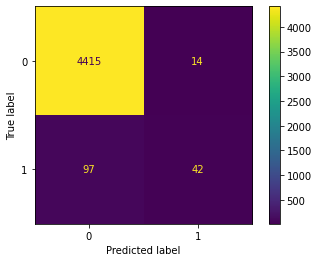

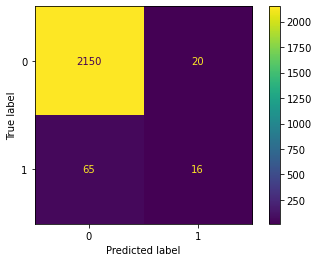

In [129]:
# Plot confusion_matrix on training data:
matrix_train_model7 = plot_confusion_matrix(gs_dtc, X_train, y_train);
cf_matrix_train_list.append(matrix_train_model7)

# Plot confusion_matrix on testing data:
matrix_test_model7 = plot_confusion_matrix(gs_dtc, X_test, y_test);
cf_matrix_test_list.append(matrix_test_model7)

# Print 4 scores on training data:
y_hat_train = gs_dtc.predict(X_train)
add_4scores_train('model7')
print_4scores_train('model7')

# Print 4 scores on testing data:
y_hat_test = gs_dtc.predict(X_test)
add_4scores_test('model7')
print_4scores_test('model7')

# calculate miss_rate:
modle7_miss_rate = get_miss_rate(gs_dtc)
miss_rate_list.append(modle7_miss_rate)

### Finding
This is worst than original Decision Tree Model.

## Imbalance Pipeline
The target is imblanced, will use SMOTE.

## Model 8 - SMOTE (sampling_strategy='auto') and Gradient Booster Model

In [62]:
# imbpipe!

imb_pipe= ImPipeline(steps=[
    ('sm',SMOTE(random_state=42)),
    ('gbc',GradientBoostingClassifier(criterion='friedman_mse', loss='exponential', max_depth=3)),
])

imb_pipe.fit(X_train, y_train)

Pipeline(steps=[('sm', SMOTE(random_state=42)),
                ('gbc', GradientBoostingClassifier(loss='exponential'))])

In [63]:
imbGBC_score_train = imb_pipe.score(X_train, y_train)
imbGBC_score_train

0.9610332749562172

In [64]:
# Validate with testing data:
imbGBC_score_test = imb_pipe.score(X_test, y_test)
imbGBC_score_test

0.9369169258107508

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)



The model's accuracy on the train set is 0.961 

The model's recall on the train set is 0.9353 

The model's precision on the train set is 0.4348 

The model's f1-score on the train is 0.5936


The model's accuracy on the test set is 0.9369 

The model's recall on the test set is 0.6667 

The model's precision on the test set is 0.3195 

The model's f1-score on the test is 0.432



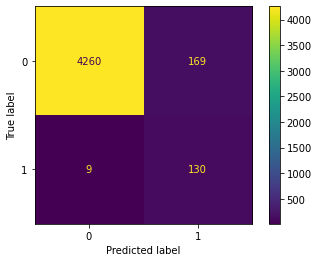

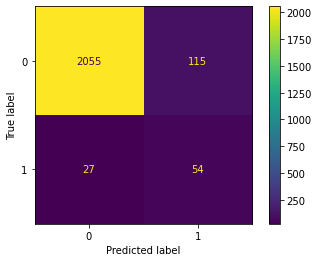

In [131]:
# Plot confusion_matrix on training data:
matrix_train_model8 = plot_confusion_matrix(imb_pipe, X_train, y_train);
cf_matrix_train_list.append(matrix_train_model8)

# Plot confusion_matrix on testing data:
matrix_test_model8 = plot_confusion_matrix(imb_pipe, X_test, y_test);
cf_matrix_test_list.append(matrix_test_model8)

# Print 4 scores on training data:
y_hat_train = imb_pipe.predict(X_train)
add_4scores_train('model8')
print_4scores_train('model8')

# Print 4 scores on testing data:
y_hat_test = imb_pipe.predict(X_test)
add_4scores_test('model8')
print_4scores_test('model8')

# calculate miss_rate:
modle8_miss_rate = get_miss_rate(imb_pipe)
miss_rate_list.append(modle8_miss_rate)

### Finding
Testing F1 score is getting better but not ideal. Try to change the SMOTE sampling_strategy from 'auto' to 0.8. 

## Model 9 - SMOTE (sampling_strategy=0.8) and Gradient Booster Model

In [66]:
# imbpipe!

imb_pipe80= ImPipeline(steps=[
    ('sm',SMOTE(random_state=42, sampling_strategy=0.8)),
    ('gbc',GradientBoostingClassifier(criterion='friedman_mse', loss='exponential', max_depth=3)),
])

imb_pipe80.fit(X_train, y_train)

Pipeline(steps=[('sm', SMOTE(random_state=42, sampling_strategy=0.8)),
                ('gbc', GradientBoostingClassifier(loss='exponential'))])

In [67]:
imbGBC80_score_train = imb_pipe80.score(X_train, y_train)
imbGBC80_score_train

0.9673817863397548

In [68]:
imbGBC80_score_test = imb_pipe80.score(X_test, y_test)
imbGBC80_score_test

0.9395824078187472

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)



The model's accuracy on the train set is 0.9674 

The model's recall on the train set is 0.9281 

The model's precision on the train set is 0.4813 

The model's f1-score on the train is 0.6339


The model's accuracy on the test set is 0.9396 

The model's recall on the test set is 0.5802 

The model's precision on the test set is 0.3154 

The model's f1-score on the test is 0.4087



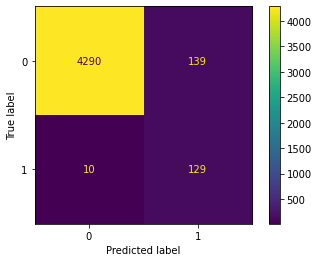

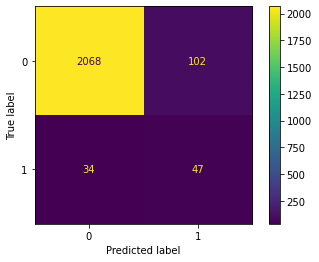

In [133]:
# Plot confusion_matrix on training data:
matrix_train_model9 = plot_confusion_matrix(imb_pipe80, X_train, y_train);
cf_matrix_train_list.append(matrix_train_model9)

# Plot confusion_matrix on testing data:
matrix_test_model9 = plot_confusion_matrix(imb_pipe80, X_test, y_test);
cf_matrix_test_list.append(matrix_test_model9)

# Print 4 scores on training data:
y_hat_train = imb_pipe80.predict(X_train)
add_4scores_train('model9')
print_4scores_train('model9')

# Print 4 scores on testing data:
y_hat_test = imb_pipe80.predict(X_test)
add_4scores_test('model9')
print_4scores_test('model9')

# calculate miss_rate:
modle9_miss_rate = get_miss_rate(imb_pipe80)
miss_rate_list.append(modle9_miss_rate)

### Finding
Can't say SMOTE makes better performance by looking at the scores.

## Evaluation and find the best model

In [70]:
# Bring the scores together from all models:

model_list = ['dummy', 'logreg', 'rfc', 'gbc', 'dtc', 'gs_gbc', 'gs_dtc', 'imbGBC', 'imbGBC80']

score_train_list = [] 
score_test_list = []

for i in model_list:
    score_train_list.append(eval(i+'_score_train'))
    score_test_list.append(eval(i+'_score_test'))

In [71]:
df_score_train = pd.DataFrame (score_train_list, columns = ['score_train'], index=model_list)
df_score_test = pd.DataFrame (score_test_list, columns = ['score_test'], index=model_list)
df_score = pd.concat([df_score_train, df_score_test], axis=1)

df_score

,score_train,score_test
dummy,0.969571,0.964018
logreg,0.964975,0.956909
rfc,0.972417,0.962684
gbc,0.968694,0.960907
dtc,0.961469,0.944911
gs_gbc,0.971323,0.964904
gs_dtc,0.970883,0.962239
imbGBC,0.961033,0.936917
imbGBC80,0.967382,0.939582


In [72]:
# Score DataFrame:

df_score['difference'] = abs(df_score['score_test']-df_score['score_train'])
df_score

,score_train,score_test,difference
dummy,0.969571,0.964018,0.005554
logreg,0.964975,0.956909,0.008066
rfc,0.972417,0.962684,0.009733
gbc,0.968694,0.960907,0.007788
dtc,0.961469,0.944911,0.016558
gs_gbc,0.971323,0.964904,0.006419
gs_dtc,0.970883,0.962239,0.008644
imbGBC,0.961033,0.936917,0.024116
imbGBC80,0.967382,0.939582,0.027799


### Finding
Model 7 gs-dtc looks like the best model with high accuracy scores on both training and testing data and the smallest difference between them.  However, to make the final decision, we still need to look into other information.

## Bring up Comfusion Matrix for models

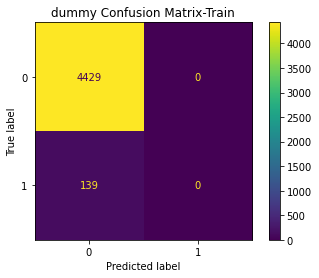

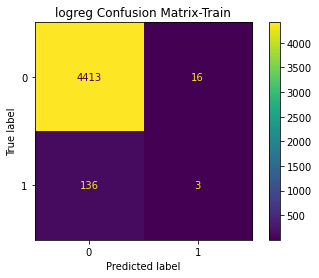

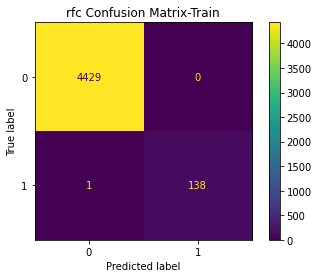

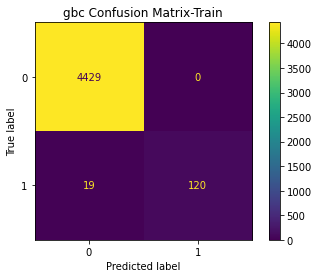

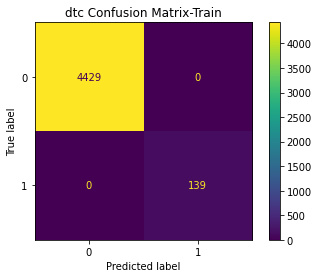

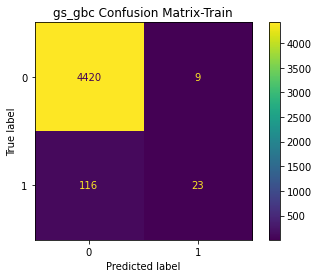

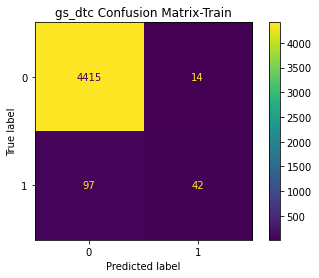

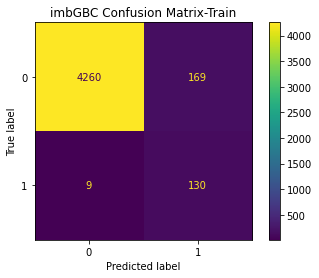

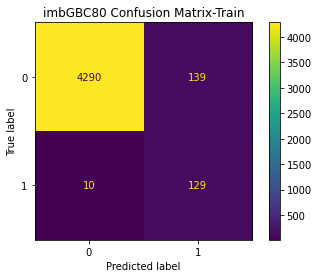

In [85]:
best_model_list = [0, 1 , 2, 3, 4, 5, 6, 7, 8]

# Print out the confusion matrix on train data set for the best models:

for i in best_model_list:
    fig = cf_matrix_train_list[i].plot()
    title = model_list[i]+' Confusion Matrix-Train'
    plt.title(title)
    plt.show();

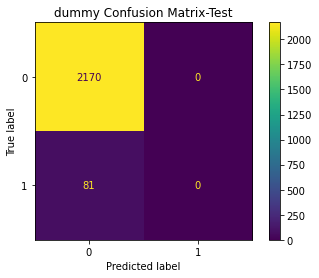

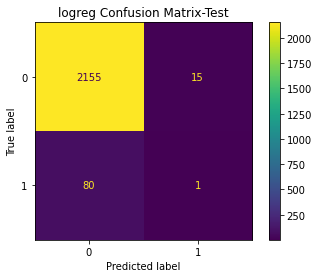

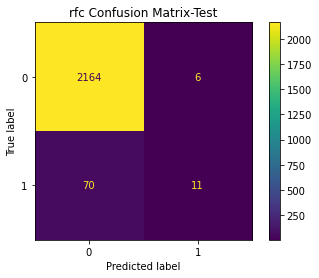

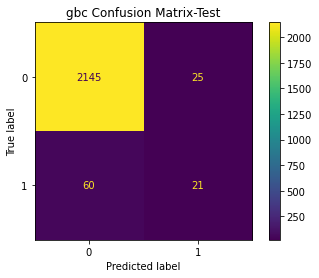

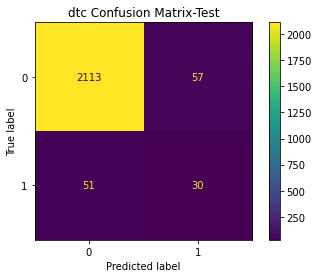

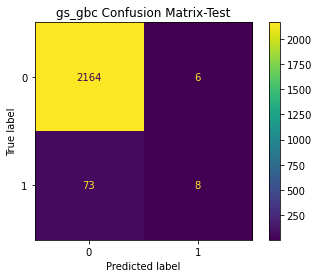

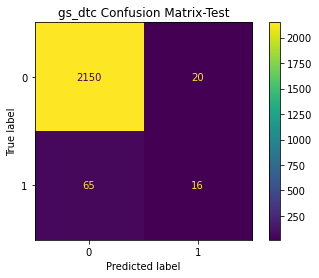

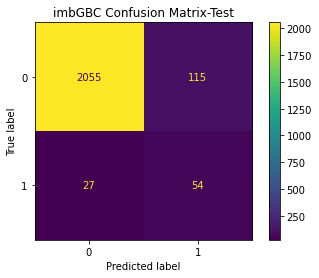

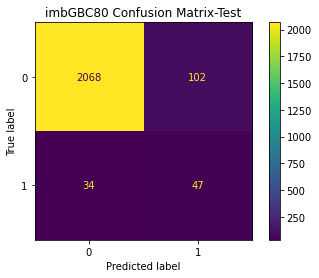

In [86]:
# Print out the confusion matrix on test data set for the best models:

for i in best_model_list:
    fig = cf_matrix_test_list[i].plot()
    title = model_list[i]+' Confusion Matrix-Test'
    plt.title(title)
    plt.show();

### gs_gbc has the best performance in training data by looking at Confusion Matrix.

## Review all models' scores

In [75]:
All4scores_train_list = [accuracy_train_dict, recall_train_dict, precision_train_dict, f1_train_dict]
df_4scores_train = pd.DataFrame(All4scores_train_list).T
df_4scores_train.columns = ['accuracy_train', 'recall_train', 'precision_train', 'f1_train']
df_4scores_train

,accuracy_train,recall_train,precision_train,f1_train
model1,0.969571,0.000000,0.000000,0.000000
model2,0.966725,0.021583,0.157895,0.037975
model3,0.999781,0.992806,1.000000,0.996390
model4,0.995841,0.863309,1.000000,0.926641
model5,1.000000,1.000000,1.000000,1.000000
model6,0.972636,0.165468,0.718750,0.269006
model7,0.975701,0.302158,0.750000,0.430769
model8,0.961033,0.935252,0.434783,0.593607
model9,0.967382,0.928058,0.481343,0.633907


In [76]:
All4scores_test_list = [accuracy_test_dict, recall_test_dict, precision_test_dict, f1_test_dict]
df_4scores_test = pd.DataFrame(All4scores_test_list).T
df_4scores_test.columns = ['accuracy_test', 'recall_test', 'precision_test', 'f1_test']
df_4scores_test

,accuracy_test,recall_test,precision_test,f1_test
model1,0.964016,0.000000,0.000000,0.000000
model2,0.957797,0.012346,0.062500,0.020619
model3,0.966237,0.135802,0.647059,0.224490
model4,0.962239,0.259259,0.456522,0.330709
model5,0.952021,0.370370,0.344828,0.357143
model6,0.964904,0.098765,0.571429,0.168421
model7,0.962239,0.197531,0.444444,0.273504
model8,0.936917,0.666667,0.319527,0.432000
model9,0.939582,0.580247,0.315436,0.408696


In [77]:
df_4scores = df_4scores_train.merge(df_4scores_test, left_index=True, right_index=True)
df_4scores.columns

Index(['accuracy_train', 'recall_train', 'precision_train', 'f1_train',
       'accuracy_test', 'recall_test', 'precision_test', 'f1_test'],
      dtype='object')

In [78]:
df_4scores.columns = ['accuracy_train', 'accuracy_test',
                      'recall_train', 'recall_test',
                      'precision_train', 'precision_test',
                      'f1_train', 'f1_test']

In [79]:
df_4scores

,accuracy_train,accuracy_test,recall_train,recall_test,precision_train,precision_test,f1_train,f1_test
model1,0.969571,0.000000,0.000000,0.000000,0.964016,0.000000,0.000000,0.000000
model2,0.966725,0.021583,0.157895,0.037975,0.957797,0.012346,0.062500,0.020619
model3,0.999781,0.992806,1.000000,0.996390,0.966237,0.135802,0.647059,0.224490
model4,0.995841,0.863309,1.000000,0.926641,0.962239,0.259259,0.456522,0.330709
model5,1.000000,1.000000,1.000000,1.000000,0.952021,0.370370,0.344828,0.357143
model6,0.972636,0.165468,0.718750,0.269006,0.964904,0.098765,0.571429,0.168421
model7,0.975701,0.302158,0.750000,0.430769,0.962239,0.197531,0.444444,0.273504
model8,0.961033,0.935252,0.434783,0.593607,0.936917,0.666667,0.319527,0.432000
model9,0.967382,0.928058,0.481343,0.633907,0.939582,0.580247,0.315436,0.408696


In [80]:
index_list = list(df_4scores.index)

In [81]:
index_list

['model1',
 'model2',
 'model3',
 'model4',
 'model5',
 'model6',
 'model7',
 'model8',
 'model9']

In [82]:
df_4scores = df_4scores.rename(index=dict(zip(index_list,model_list)))

In [83]:
df_4scores

,accuracy_train,accuracy_test,recall_train,recall_test,precision_train,precision_test,f1_train,f1_test
dummy,0.969571,0.000000,0.000000,0.000000,0.964016,0.000000,0.000000,0.000000
logreg,0.966725,0.021583,0.157895,0.037975,0.957797,0.012346,0.062500,0.020619
rfc,0.999781,0.992806,1.000000,0.996390,0.966237,0.135802,0.647059,0.224490
gbc,0.995841,0.863309,1.000000,0.926641,0.962239,0.259259,0.456522,0.330709
dtc,1.000000,1.000000,1.000000,1.000000,0.952021,0.370370,0.344828,0.357143
gs_gbc,0.972636,0.165468,0.718750,0.269006,0.964904,0.098765,0.571429,0.168421
gs_dtc,0.975701,0.302158,0.750000,0.430769,0.962239,0.197531,0.444444,0.273504
imbGBC,0.961033,0.935252,0.434783,0.593607,0.936917,0.666667,0.319527,0.432000
imbGBC80,0.967382,0.928058,0.481343,0.633907,0.939582,0.580247,0.315436,0.408696


In [148]:
dfi.export(df_4scores, "/content/gdrive/MyDrive/4blog/4scores")

### By looking at F1 socre, the best model is probably imbGBC or imbGBC80.

## Miss_rate: Now let's bring in miss_rate

How to calculate false negative rate?
The false negative rate – also called the miss rate – is the probability that a true positive will be missed by the test. It's calculated as FN/FN+TP, where FN is the number of false negatives and TP is the number of true positives (FN+TP being the total number of positives).

In [135]:
miss_rate_list

[1.0,
 0.9876543209876543,
 0.8641975308641975,
 0.7407407407407407,
 0.6296296296296297,
 0.9012345679012346,
 0.8024691358024691,
 0.3333333333333333,
 0.41975308641975306]

In [136]:
df_all_score = df_4scores.copy()

In [137]:
df_all_score['miss_rate']=miss_rate_list

In [138]:
df_all_score

,accuracy_train,accuracy_test,recall_train,recall_test,precision_train,precision_test,f1_train,f1_test,miss_rate
dummy,0.969571,0.000000,0.000000,0.000000,0.964016,0.000000,0.000000,0.000000,1.000000
logreg,0.966725,0.021583,0.157895,0.037975,0.957797,0.012346,0.062500,0.020619,0.987654
rfc,0.999781,0.992806,1.000000,0.996390,0.966237,0.135802,0.647059,0.224490,0.864198
gbc,0.995841,0.863309,1.000000,0.926641,0.962239,0.259259,0.456522,0.330709,0.740741
dtc,1.000000,1.000000,1.000000,1.000000,0.952021,0.370370,0.344828,0.357143,0.629630
gs_gbc,0.972636,0.165468,0.718750,0.269006,0.964904,0.098765,0.571429,0.168421,0.901235
gs_dtc,0.975701,0.302158,0.750000,0.430769,0.962239,0.197531,0.444444,0.273504,0.802469
imbGBC,0.961033,0.935252,0.434783,0.593607,0.936917,0.666667,0.319527,0.432000,0.333333
imbGBC80,0.967382,0.928058,0.481343,0.633907,0.939582,0.580247,0.315436,0.408696,0.419753


In [140]:
# Find the smallest miss_rate:

df_all_score.style.highlight_min(subset='miss_rate', color='red')

,accuracy_train,accuracy_test,recall_train,recall_test,precision_train,precision_test,f1_train,f1_test,miss_rate
dummy,0.969571,0.000000,0.000000,0.000000,0.964016,0.000000,0.000000,0.000000,1.000000
logreg,0.966725,0.021583,0.157895,0.037975,0.957797,0.012346,0.062500,0.020619,0.987654
rfc,0.999781,0.992806,1.000000,0.996390,0.966237,0.135802,0.647059,0.224490,0.864198
gbc,0.995841,0.863309,1.000000,0.926641,0.962239,0.259259,0.456522,0.330709,0.740741
dtc,1.000000,1.000000,1.000000,1.000000,0.952021,0.370370,0.344828,0.357143,0.629630
gs_gbc,0.972636,0.165468,0.718750,0.269006,0.964904,0.098765,0.571429,0.168421,0.901235
gs_dtc,0.975701,0.302158,0.750000,0.430769,0.962239,0.197531,0.444444,0.273504,0.802469
imbGBC,0.961033,0.935252,0.434783,0.593607,0.936917,0.666667,0.319527,0.432000,0.333333
imbGBC80,0.967382,0.928058,0.481343,0.633907,0.939582,0.580247,0.315436,0.408696,0.419753


In [147]:
dfi.export(df_all_score, "/content/gdrive/MyDrive/4blog/final_scores")

# Best Model is imbGBC: SMOTE and Gradient Booster Model